In [1]:
!pip install facenet_pytorch
from IPython.display import clear_output

# Lệnh xóa đầu ra
clear_output()

In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
import numpy as np
import os
import traceback
from tqdm import tqdm
import shutil
from PIL import Image
import torch.nn.functional as F
import random

import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:
trans = transforms.Compose([
#     transforms.RandomRotation(degrees=(-15, 15)),
    transforms.Resize((256, 256)),
    np.float32,
    transforms.ToTensor(),
    fixed_image_standardization
])

In [5]:
path_root = '/kaggle/input/new-data-face/data_train_2d_new/data_train_2d'
# path_root = '/kaggle/input/data-test-mtcnn/data_2d/content/data_2d'
new_path_train = '/kaggle/working/data_train_2d'
new_path_test = '/kaggle/working/data_test_2d'

if os.path.exists(new_path_train):
    shutil.rmtree(new_path_train)
os.makedirs(new_path_train, exist_ok=True)

if os.path.exists(new_path_test):
    shutil.rmtree(new_path_test)
os.makedirs(new_path_test, exist_ok=True)

list_id = os.listdir(path_root)
random.shuffle(list_id)
list_train = ['1038', '1190', '1187', '1041', '2175', '1134', '2059', '1220', '1119', '2198', '2005', '1031', '1008', '1042', '1221', '1080', '2170', '1032', '2029', '2046', '1075', '2017', '1012', '2213', '2023', '2002', '2072', '2197', '1089', '2183', '1027', '1189', '2215', '2200', '2191', '2214', '1186', '2193', '1182', '1002', '2223', '1050', '1188', '1133', '1200', '2075', '1151', '1116', '2006', '2207', '1022', '1208', '1024', '1199', '1088', '2177', '2009', '2185', '1195', '1213', '2051', '2021', '1099', '2052', '2019', '2218', '2205', '2226', '1013', '2173', '1003', '1144', '1175', '1085', '1196', '2209', '1074', '2068', '2188', '2195', '2086', '2016', '1039', '1217', '2011', '2186', '1037', '1181', '1173', '2203', '1066', '1004', '2180', '2008', '1201', '1197', '1192', '2201', '1174', '1184', '2060', '2064', '2181', '2012']
list_test = ['2172', '1040', '2189', '2174', '2184', '1043', '2219', '2179', '2225', '1072', '2210', '2074', '1001', '2001', '1014', '2176', '1177', '2141', '2004', '1067', '2211', '2054', '2178', '1047', '2190', '1025', '1009']
# list_train = ['2026', '2156', '1026', '1176', '1091', '2015','2094', '2096', '1178', '1203', '1145', '2187', '1108', '2130', '2063', '1142', '2162', '2007', '2155', '2073', '1191', '2087', '2106', '2229', '2115', '2124']

for id in list_train:
    path_id = os.path.join(path_root, id)
    list_id_image = [x for x in os.listdir(path_id) if x.endswith('.png')]
    if len(list_id_image) > 1:
        if len(list_id_image) > 5:
            list_id_image = random.sample(list_id_image, 5)
        os.makedirs(os.path.join(new_path_train, id), exist_ok=True)
        for id_image in list_id_image:
            source_file = os.path.join(path_id, id_image)
            destination_file = os.path.join(new_path_train, id, id_image)
            shutil.copy(source_file, destination_file)

for id in list_test:
    path_id = os.path.join(path_root, id)
    list_id_image = [x for x in os.listdir(path_id) if x.endswith('.png')]
    if len(list_id_image) > 1:
        if len(list_id_image) > 5:
            list_id_image = random.sample(list_id_image, 5)
        os.makedirs(os.path.join(new_path_test, id), exist_ok=True)
        for id_image in list_id_image:
            source_file = os.path.join(path_id, id_image)
            destination_file = os.path.join(new_path_test, id, id_image)
            shutil.copy(source_file, destination_file)
            

path_root = '/kaggle/input/new-data-face/data_train_3d_new/data_train_3d'
# path_root = '/kaggle/input/data-test-mtcnn/data_3d/content/data_3d'
new_path_train = '/kaggle/working/data_train_3d'
new_path_test = '/kaggle/working/data_test_3d'

if os.path.exists(new_path_train):
    shutil.rmtree(new_path_train)
os.makedirs(new_path_train, exist_ok=True)

if os.path.exists(new_path_test):
    shutil.rmtree(new_path_test)
os.makedirs(new_path_test, exist_ok=True)

list_id = os.listdir(path_root)
random.shuffle(list_id)
list_train = ['1038', '1190', '1187', '1041', '2175', '1134', '2059', '1220', '1119', '2198', '2005', '1031', '1008', '1042', '1221', '1080', '2170', '1032', '2029', '2046', '1075', '2017', '1012', '2213', '2023', '2002', '2072', '2197', '1089', '2183', '1027', '1189', '2215', '2200', '2191', '2214', '1186', '2193', '1182', '1002', '2223', '1050', '1188', '1133', '1200', '2075', '1151', '1116', '2006', '2207', '1022', '1208', '1024', '1199', '1088', '2177', '2009', '2185', '1195', '1213', '2051', '2021', '1099', '2052', '2019', '2218', '2205', '2226', '1013', '2173', '1003', '1144', '1175', '1085', '1196', '2209', '1074', '2068', '2188', '2195', '2086', '2016', '1039', '1217', '2011', '2186', '1037', '1181', '1173', '2203', '1066', '1004', '2180', '2008', '1201', '1197', '1192', '2201', '1174', '1184', '2060', '2064', '2181', '2012']
list_test = ['2172', '1040', '2189', '2174', '2184', '1043', '2219', '2179', '2225', '1072', '2210', '2074', '1001', '2001', '1014', '2176', '1177', '2141', '2004', '1067', '2211', '2054', '2178', '1047', '2190', '1025', '1009']
# list_train = ['2026', '2156', '1026', '1176', '1091', '2015','2094', '2096', '1178', '1203', '1145', '2187', '1108', '2130', '2063', '1142', '2162', '2007', '2155', '2073', '1191', '2087', '2106', '2229', '2115', '2124']

for id in list_train:
    path_id = os.path.join(path_root, id)
    list_id_image = [x for x in os.listdir(path_id) if x.endswith('.png')]
    if len(list_id_image) > 1:
        if len(list_id_image) > 5:
            list_id_image = random.sample(list_id_image, 5)
        os.makedirs(os.path.join(new_path_train, id), exist_ok=True)
        for id_image in list_id_image:
            source_file = os.path.join(path_id, id_image)
            destination_file = os.path.join(new_path_train, id, id_image)
            shutil.copy(source_file, destination_file)

for id in list_test:
    path_id = os.path.join(path_root, id)
    list_id_image = [x for x in os.listdir(path_id) if x.endswith('.png')]
    if len(list_id_image) > 1:
        if len(list_id_image) > 5:
            list_id_image = random.sample(list_id_image, 5)
        os.makedirs(os.path.join(new_path_test, id), exist_ok=True)
        for id_image in list_id_image:
            source_file = os.path.join(path_id, id_image)
            destination_file = os.path.join(new_path_test, id, id_image)
            shutil.copy(source_file, destination_file)

In [6]:
import os
from PIL import Image
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def cal_ROC(base_path, title, is_distance=True):
    outputs_list = []

    # Kiểm tra xem model có sử dụng CUDA hay không
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Đảm bảo model đang ở chế độ đánh giá
    model.eval()

    with torch.no_grad():
        for root, dirs, files in tqdm(os.walk(base_path)):
            for file in files:
                if file.endswith('.png'):  # Lọc các tệp tin ảnh
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path).convert('RGB')
                    img = trans(img)
                    input_tensor = img.unsqueeze(0).to(device)

                    output = model(input_tensor)

                    # Lấy ID từ đường dẫn của file
                    id_ = os.path.basename(root)

                    outputs_list.append((id_, output.cpu().numpy()))  # Lưu ID và output
    scores = []
    labels = []
    if is_distance:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.pairwise_distance(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(0 if id1 == id2 else 1)
    else:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.cosine_similarity(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(1 if id1 == id2 else 0)
    # In thử kết quả
    print("Scores:", scores[:5])
    print("Labels:", labels[:5])

    # Giả sử y_true là nhãn thực và y_scores là điểm dự đoán từ mô hình embedding
    y_true = np.array(labels)
    y_scores = np.array(scores)

    # Tính toán FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Tính AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [7]:
# dir_2d = '/kaggle/input/data-test-mtcnn/data_2d/content/data_2d'
# dir_3d = '/kaggle/input/data-test-mtcnn/data_3d/content/data_3d'

dir_2d = '/kaggle/working/data_test_2d'
dir_3d = '/kaggle/working/data_test_3d'

28it [00:02, 10.65it/s]
100%|██████████| 93/93 [00:00<00:00, 719.63it/s]


Scores: [0.8269791603088379, 1.4310041666030884, 1.3738731145858765, 1.2136471271514893, 0.9377846717834473]
Labels: [0, 1, 1, 1, 1]


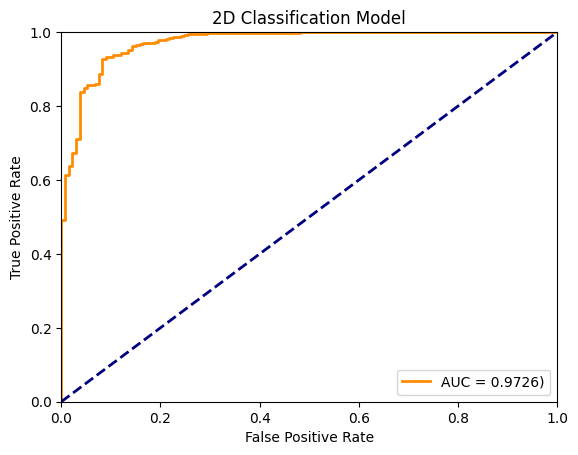

In [8]:
model = InceptionResnetV1()
model_path = '/kaggle/input/weight-cal-auc/cla_2d.pt'
if torch.cuda.is_available():
    # Nếu có GPU, thì nạp mô hình và đặt map_location=torch.device('cuda')
    state_dict = torch.load(model_path, map_location=torch.device('cuda'))
else:
    # Nếu không có GPU, thì nạp mô hình và đặt map_location=torch.device('cpu')
    state_dict = torch.load(model_path, map_location=torch.device('cpu'))
new_state_dict = {k: v for k, v in state_dict.items() if not k.startswith('logits')}
model.load_state_dict(new_state_dict)
model.eval()
model.to('cuda')
from IPython.display import clear_output
# Lệnh xóa đầu ra
clear_output()

cal_ROC(dir_2d, '2D Classification Model', True)

28it [00:02, 11.93it/s]
100%|██████████| 93/93 [00:00<00:00, 688.54it/s]


Scores: [0.7946270704269409, 1.560625672340393, 1.499373197555542, 1.2914564609527588, 1.3343690633773804]
Labels: [0, 1, 1, 1, 1]


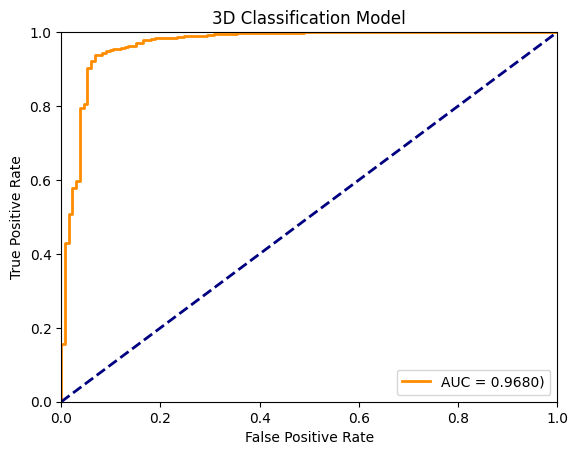

In [9]:
model = InceptionResnetV1()
model_path = '/kaggle/input/weight-cal-auc/cla_3d.pt'
if torch.cuda.is_available():
    # Nếu có GPU, thì nạp mô hình và đặt map_location=torch.device('cuda')
    state_dict = torch.load(model_path, map_location=torch.device('cuda'))
else:
    # Nếu không có GPU, thì nạp mô hình và đặt map_location=torch.device('cpu')
    state_dict = torch.load(model_path, map_location=torch.device('cpu'))
new_state_dict = {k: v for k, v in state_dict.items() if not k.startswith('logits')}
model.load_state_dict(new_state_dict)
model.eval()
model.to('cuda')
from IPython.display import clear_output
# Lệnh xóa đầu ra
clear_output()

cal_ROC(dir_3d, '3D Classification Model', True)

In [10]:
import os

import torch
from torch import nn
from torch.nn import functional as F

class BasicConv2d(nn.Module):

    def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
        super().__init__()
        self.conv = nn.Conv2d(
            in_planes, out_planes,
            kernel_size=kernel_size, stride=stride,
            padding=padding, bias=False
        ) # verify bias false
        self.bn = nn.BatchNorm2d(
            out_planes,
            eps=0.001, # value found in tensorflow
            momentum=0.1, # default pytorch value
            affine=True
        )
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x


class Block35(nn.Module):

    def __init__(self, scale=1.0):
        super().__init__()

        self.scale = scale

        self.branch0 = BasicConv2d(256, 32, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(256, 32, kernel_size=1, stride=1),
            BasicConv2d(32, 32, kernel_size=3, stride=1, padding=1)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(256, 32, kernel_size=1, stride=1),
            BasicConv2d(32, 32, kernel_size=3, stride=1, padding=1),
            BasicConv2d(32, 32, kernel_size=3, stride=1, padding=1)
        )

        self.conv2d = nn.Conv2d(96, 256, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        out = torch.cat((x0, x1, x2), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


class Block17(nn.Module):

    def __init__(self, scale=1.0):
        super().__init__()

        self.scale = scale

        self.branch0 = BasicConv2d(896, 128, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(896, 128, kernel_size=1, stride=1),
            BasicConv2d(128, 128, kernel_size=(1,7), stride=1, padding=(0,3)),
            BasicConv2d(128, 128, kernel_size=(7,1), stride=1, padding=(3,0))
        )

        self.conv2d = nn.Conv2d(256, 896, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        out = torch.cat((x0, x1), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


class Block8(nn.Module):

    def __init__(self, scale=1.0, noReLU=False):
        super().__init__()

        self.scale = scale
        self.noReLU = noReLU

        self.branch0 = BasicConv2d(1792, 192, kernel_size=1, stride=1)

        self.branch1 = nn.Sequential(
            BasicConv2d(1792, 192, kernel_size=1, stride=1),
            BasicConv2d(192, 192, kernel_size=(1,3), stride=1, padding=(0,1)),
            BasicConv2d(192, 192, kernel_size=(3,1), stride=1, padding=(1,0))
        )

        self.conv2d = nn.Conv2d(384, 1792, kernel_size=1, stride=1)
        if not self.noReLU:
            self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        out = torch.cat((x0, x1), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        if not self.noReLU:
            out = self.relu(out)
        return out


class Mixed_6a(nn.Module):

    def __init__(self):
        super().__init__()

        self.branch0 = BasicConv2d(256, 384, kernel_size=3, stride=2)

        self.branch1 = nn.Sequential(
            BasicConv2d(256, 192, kernel_size=1, stride=1),
            BasicConv2d(192, 192, kernel_size=3, stride=1, padding=1),
            BasicConv2d(192, 256, kernel_size=3, stride=2)
        )

        self.branch2 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        out = torch.cat((x0, x1, x2), 1)
        return out


class Mixed_7a(nn.Module):

    def __init__(self):
        super().__init__()

        self.branch0 = nn.Sequential(
            BasicConv2d(896, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 384, kernel_size=3, stride=2)
        )

        self.branch1 = nn.Sequential(
            BasicConv2d(896, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 256, kernel_size=3, stride=2)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(896, 256, kernel_size=1, stride=1),
            BasicConv2d(256, 256, kernel_size=3, stride=1, padding=1),
            BasicConv2d(256, 256, kernel_size=3, stride=2)
        )

        self.branch3 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        out = torch.cat((x0, x1, x2, x3), 1)
        return out


class InceptionResnetV1_re(nn.Module):
    """Inception Resnet V1 model with optional loading of pretrained weights.

    Model parameters can be loaded based on pretraining on the VGGFace2 or CASIA-Webface
    datasets. Pretrained state_dicts are automatically downloaded on model instantiation if
    requested and cached in the torch cache. Subsequent instantiations use the cache rather than
    redownloading.

    Keyword Arguments:
        pretrained {str} -- Optional pretraining dataset. Either 'vggface2' or 'casia-webface'.
            (default: {None})
        classify {bool} -- Whether the model should output classification probabilities or feature
            embeddings. (default: {False})
        num_classes {int} -- Number of output classes. If 'pretrained' is set and num_classes not
            equal to that used for the pretrained model, the final linear layer will be randomly
            initialized. (default: {None})
        dropout_prob {float} -- Dropout probability. (default: {0.6})
    """
    def __init__(self, classify=False, num_classes=None, dropout_prob=0.6, device=None):
        super().__init__()

        # Set simple attributes
        self.classify = classify
        self.num_classes = num_classes


        # Define layers
        self.conv2d_1a = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.conv2d_2a = BasicConv2d(32, 32, kernel_size=3, stride=1)
        self.conv2d_2b = BasicConv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool_3a = nn.MaxPool2d(3, stride=2)
        self.conv2d_3b = BasicConv2d(64, 80, kernel_size=1, stride=1)
        self.conv2d_4a = BasicConv2d(80, 192, kernel_size=3, stride=1)
        self.conv2d_4b = BasicConv2d(192, 256, kernel_size=3, stride=2)
        self.repeat_1 = nn.Sequential(
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
        )
        self.mixed_6a = Mixed_6a()
        self.repeat_2 = nn.Sequential(
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
        )
        self.mixed_7a = Mixed_7a()
        self.repeat_3 = nn.Sequential(
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
        )
        self.block8 = Block8(noReLU=True)
        self.avgpool_1a = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(dropout_prob)
        self.last_linear = nn.Linear(1792, 512, bias=False)
        self.last_bn = nn.BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True)

        if self.classify and self.num_classes is not None:
            self.logits = nn.Linear(512, self.num_classes)

        self.device = torch.device('cpu')
        if device is not None:
            self.device = device
            self.to(device)

    def forward(self, x):
        """Calculate embeddings or logits given a batch of input image tensors.

        Arguments:
            x {torch.tensor} -- Batch of image tensors representing faces.

        Returns:
            torch.tensor -- Batch of embedding vectors or multinomial logits.
        """
        x = self.conv2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.conv2d_4b(x)
        x = self.repeat_1(x)
        x = self.mixed_6a(x)
        x = self.repeat_2(x)
        x = self.mixed_7a(x)
        x = self.repeat_3(x)
        x = self.block8(x)
        x = self.avgpool_1a(x)
        x = self.dropout(x)
        x = self.last_linear(x.view(x.shape[0], -1))
        x = self.last_bn(x)
        if self.classify:
            x = self.logits(x)
        else:
            x = F.normalize(x, p=2, dim=1)
        return x
    
class InceptionResnetV1_feature(nn.Module):
    """Inception Resnet V1 model with optional loading of pretrained weights.

    Model parameters can be loaded based on pretraining on the VGGFace2 or CASIA-Webface
    datasets. Pretrained state_dicts are automatically downloaded on model instantiation if
    requested and cached in the torch cache. Subsequent instantiations use the cache rather than
    redownloading.

    Keyword Arguments:
        pretrained {str} -- Optional pretraining dataset. Either 'vggface2' or 'casia-webface'.
            (default: {None})
        classify {bool} -- Whether the model should output classification probabilities or feature
            embeddings. (default: {False})
        num_classes {int} -- Number of output classes. If 'pretrained' is set and num_classes not
            equal to that used for the pretrained model, the final linear layer will be randomly
            initialized. (default: {None})
        dropout_prob {float} -- Dropout probability. (default: {0.6})
    """
    def __init__(self, classify=False, num_classes=None, dropout_prob=0.6, device=None):
        super().__init__()

        # Set simple attributes
        self.classify = classify
        self.num_classes = num_classes


        # Define layers
        self.conv2d_1a = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.conv2d_2a = BasicConv2d(32, 32, kernel_size=3, stride=1)
        self.conv2d_2b = BasicConv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool_3a = nn.MaxPool2d(3, stride=2)
        self.conv2d_3b = BasicConv2d(64, 80, kernel_size=1, stride=1)
        self.conv2d_4a = BasicConv2d(80, 192, kernel_size=3, stride=1)
        self.conv2d_4b = BasicConv2d(192, 256, kernel_size=3, stride=2)
        self.repeat_1 = nn.Sequential(
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
        )
        self.mixed_6a = Mixed_6a()
        self.repeat_2 = nn.Sequential(
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
        )
        self.mixed_7a = Mixed_7a()
        self.repeat_3 = nn.Sequential(
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
        )
        self.block8 = Block8(noReLU=True)
        self.avgpool_1a = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(dropout_prob)
        self.last_linear = nn.Linear(1792, 512, bias=False)

    def forward(self, x):
        """Calculate embeddings or logits given a batch of input image tensors.

        Arguments:
            x {torch.tensor} -- Batch of image tensors representing faces.

        Returns:
            torch.tensor -- Batch of embedding vectors or multinomial logits.
        """
        x = self.conv2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.conv2d_4b(x)
        x = self.repeat_1(x)
        x = self.mixed_6a(x)
        x = self.repeat_2(x)
        x = self.mixed_7a(x)
        x = self.repeat_3(x)
        x = self.block8(x)
        x = self.avgpool_1a(x)
        x = self.dropout(x)
        x = self.last_linear(x.view(x.shape[0], -1))
        return x

In [11]:
class ResNetConcat(nn.Module):
    def __init__(self, num_classes=1000, classify = True):
        super(ResNetConcat, self).__init__()
        # Load pre-trained ResNet models
        self.classify = classify
        self.resnet1 = InceptionResnetV1_feature(classify=True, num_classes=num_classes)
        self.resnet2 = InceptionResnetV1_feature(classify=True, num_classes=num_classes)
        self.last_bn = nn.BatchNorm1d(1024, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
#         self.last_linear = nn.Linear(1024, 1024, bias=False)
#         self.logits = nn.Linear(1024, num_classes, bias=True)
        
    def forward(self, x1, x2):
        # Forward pass for the first image
        x1 = self.resnet1(x1)
        x1 = torch.flatten(x1, 1)
        
        x2 = self.resnet2(x2)
        x2 = torch.flatten(x2, 1)        
        # Concatenate the outputs
        x = torch.cat((x1, x2), dim=1)
#         x = self.last_linear(x)
        # Apply batch normalization
        x = self.last_bn(x)
        
        # Final logits
        if self.classify:
            x = self.logits(x)
        else:
            x = F.normalize(x, p=2, dim=1)
        return x

In [13]:
def cal_ROC_concat(base_path1, base_path2, is_distance=True):
    outputs_list = []

    # Kiểm tra xem model có sử dụng CUDA hay không
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Đảm bảo model đang ở chế độ đánh giá
    model.eval()
    with torch.no_grad():
        for id in tqdm(os.listdir(base_path1)):
            id_path1 = os.path.join(base_path1, id)
            id_path2 = os.path.join(base_path2, id)
            for file_name in os.listdir(id_path1):
                if file_name.endswith('.png'):  # Lọc các tệp tin ảnh
                    img_path1 = os.path.join(id_path1, file_name)
                    img_path2 = os.path.join(id_path2, file_name)
                    img1 = Image.open(img_path1).convert('RGB')
                    img1 = trans(img1)
                    input_tensor1 = img1.unsqueeze(0).to(device)
                    
                    img2 = Image.open(img_path2).convert('RGB')
                    img2 = trans(img2)
                    input_tensor2 = img2.unsqueeze(0).to(device)
                    output = model(input_tensor1, input_tensor2)

                    outputs_list.append((id, output.cpu().numpy()))  # Lưu ID và output
    scores = []
    labels = []
    if is_distance:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.pairwise_distance(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(0 if id1 == id2 else 1)
    else:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.cosine_similarity(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(1 if id1 == id2 else 0)
    # In thử kết quả
    print("Scores:", scores[:5])
    print("Labels:", labels[:5])

    # Giả sử y_true là nhãn thực và y_scores là điểm dự đoán từ mô hình embedding
    y_true = np.array(labels)
    y_scores = np.array(scores)

    # Tính toán FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Tính AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.4f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Concat Classification Model')
    plt.legend(loc="lower right")
    plt.show()

100%|██████████| 93/93 [00:00<00:00, 698.35it/s]


Scores: [0.7887248992919922, 1.5788501501083374, 1.2603061199188232, 1.4477483034133911, 1.2923320531845093]
Labels: [0, 1, 1, 1, 1]


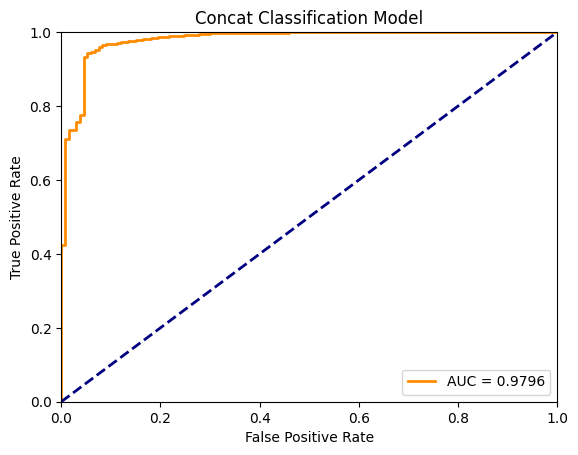

In [14]:
model = ResNetConcat(classify = False)

model_path = '/kaggle/input/weight-cal-auc/cla_concat.pt'
if torch.cuda.is_available():
    # Nếu có GPU, thì nạp mô hình và đặt map_location=torch.device('cuda')
    state_dict = torch.load(model_path, map_location=torch.device('cuda'))
else:
    # Nếu không có GPU, thì nạp mô hình và đặt map_location=torch.device('cpu')
    state_dict = torch.load(model_path, map_location=torch.device('cpu'))
new_state_dict = {k: v for k, v in state_dict.items() if not k.startswith('logits')}
model.load_state_dict(new_state_dict)
model.eval()
model.to('cuda')
from IPython.display import clear_output
# Lệnh xóa đầu ra
clear_output()

cal_ROC_concat(dir_2d, dir_3d, True)

In [15]:
!git clone https://github.com/hoangngoclam298/Siamese-Triplet-Model.git

Cloning into 'Siamese-Triplet-Model'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 89 (delta 30), reused 73 (delta 14), pack-reused 0
Unpacking objects: 100% (89/89), 4.05 MiB | 12.46 MiB/s, done.


In [16]:
%cd /kaggle/working/Siamese-Triplet-Model

/kaggle/working/Siamese-Triplet-Model


In [17]:
from networks import *
from datasets import *
from losses import *
from metrics import *
from trainer import *

In [23]:
import os
from PIL import Image
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def cal_ROC(base_path, title, is_distance=True):
    outputs_list = []

    # Kiểm tra xem model có sử dụng CUDA hay không
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Đảm bảo model đang ở chế độ đánh giá
    model.eval()

    with torch.no_grad():
        for root, dirs, files in tqdm(os.walk(base_path)):
            for file in files:
                if file.endswith('.png'):  # Lọc các tệp tin ảnh
                    img_path = os.path.join(root, file)
                    img = Image.open(img_path).convert('RGB')
                    img = trans(img)
                    input_tensor = img.unsqueeze(0).to(device)

                    output = model.get_embedding(input_tensor)

                    # Lấy ID từ đường dẫn của file
                    id_ = os.path.basename(root)

                    outputs_list.append((id_, output.cpu().numpy()))  # Lưu ID và output
    scores = []
    labels = []
    if is_distance:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)
                # Tính cosine similarity
                score = F.pairwise_distance(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(0 if id1 == id2 else 1)
    else:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)
                print(tensor1.shape)
                print(tensor2.shape)
                # Tính cosine similarity
                score = F.cosine_similarity(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(1 if id1 == id2 else 0)
    # In thử kết quả
    print("Scores:", scores[:5])
    print("Labels:", labels[:5])

    # Giả sử y_true là nhãn thực và y_scores là điểm dự đoán từ mô hình embedding
    y_true = np.array(labels)
    y_scores = np.array(scores)

    # Tính toán FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Tính AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.4f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [21]:
import os
from PIL import Image
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def cal_ROC_concat(base_path1, base_path2, is_distance=True):
    outputs_list = []

    # Kiểm tra xem model có sử dụng CUDA hay không
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Đảm bảo model đang ở chế độ đánh giá
    model.eval()
    with torch.no_grad():
        for id in tqdm(os.listdir(base_path1)):
            id_path1 = os.path.join(base_path1, id)
            id_path2 = os.path.join(base_path2, id)
            for file_name in os.listdir(id_path1):
                if file_name.endswith('.png'):  # Lọc các tệp tin ảnh
                    img_path1 = os.path.join(id_path1, file_name)
                    img_path2 = os.path.join(id_path2, file_name)
                    img1 = Image.open(img_path1).convert('RGB')
                    img1 = trans(img1)
                    input_tensor1 = img1.unsqueeze(0).to(device)
                    
                    img2 = Image.open(img_path2).convert('RGB')
                    img2 = trans(img2)
                    input_tensor2 = img2.unsqueeze(0).to(device)
                    output = model.get_embedding(input_tensor1, input_tensor2)

                    outputs_list.append((id, output.cpu().numpy()))  # Lưu ID và output
    scores = []
    labels = []
    if is_distance:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.pairwise_distance(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(0 if id1 == id2 else 1)
    else:
        for i in tqdm(range(len(outputs_list))):
            for j in range(i + 1, len(outputs_list)):
                id1, tensor1 = outputs_list[i]
                id2, tensor2 = outputs_list[j]

                # Chuyển đổi numpy array về tensor để tính toán
                tensor1 = torch.tensor(tensor1)
                tensor2 = torch.tensor(tensor2)

                # Tính cosine similarity
                score = F.cosine_similarity(tensor1, tensor2).item()

                # Lưu độ tương đồng và nhãn
                scores.append(score)
                labels.append(1 if id1 == id2 else 0)
    # In thử kết quả
    print("Scores:", scores[:5])
    print("Labels:", labels[:5])

    # Giả sử y_true là nhãn thực và y_scores là điểm dự đoán từ mô hình embedding
    y_true = np.array(labels)
    y_scores = np.array(scores)

    # Tính toán FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Tính AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.4f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Concat Triplet Model')
    plt.legend(loc="lower right")
    plt.show()

28it [00:02, 12.07it/s]
100%|██████████| 93/93 [00:00<00:00, 734.08it/s]


Scores: [3.351227283477783, 2.795783042907715, 2.822916269302368, 2.505220413208008, 1.9773454666137695]
Labels: [0, 1, 1, 1, 1]


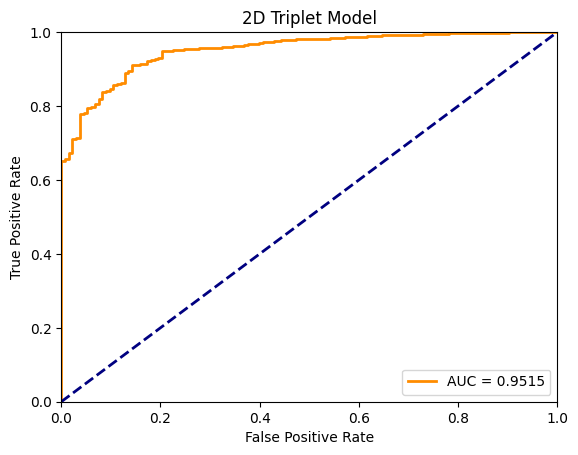

In [24]:
margin = 1.
embedding_net = EmbeddingNet(len_embedding = 512)
model = TripletNet(embedding_net)

state_dict = torch.load('/kaggle/input/weight-cal-auc/tri_2d.pt', map_location=torch.device('cuda'))
model.load_state_dict(state_dict, strict=True)
model.eval()
model.to('cuda')

# Lệnh xóa đầu ra
clear_output()

cal_ROC(dir_2d, '2D Triplet Model', True)

28it [00:02, 11.77it/s]
100%|██████████| 93/93 [00:00<00:00, 727.33it/s]


Scores: [2.5020806789398193, 4.609044075012207, 3.26751708984375, 4.331226825714111, 5.254857540130615]
Labels: [0, 1, 1, 1, 1]


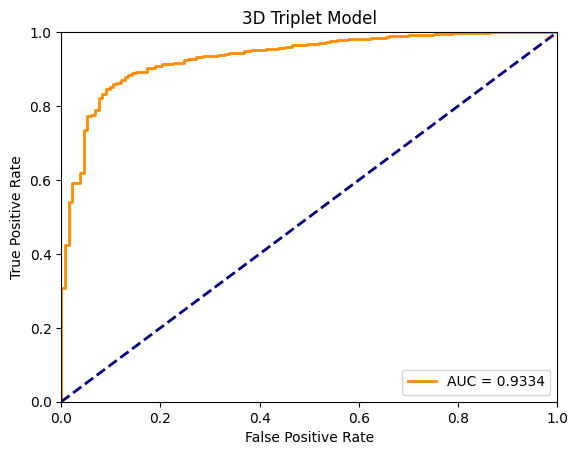

In [27]:
margin = 1.
embedding_net = EmbeddingNet(len_embedding = 512)
model = TripletNet(embedding_net)

state_dict = torch.load('/kaggle/input/weight-cal-auc/tri_3d.pt', map_location=torch.device('cuda'))
model.load_state_dict(state_dict, strict=True)
model.eval()
model.to('cuda')

# Lệnh xóa đầu ra
clear_output()

cal_ROC(dir_3d, '3D Triplet Model', True)

100%|██████████| 93/93 [00:00<00:00, 729.85it/s]


Scores: [10.929638862609863, 10.571334838867188, 12.98664665222168, 7.508189678192139, 8.550657272338867]
Labels: [0, 1, 1, 1, 1]


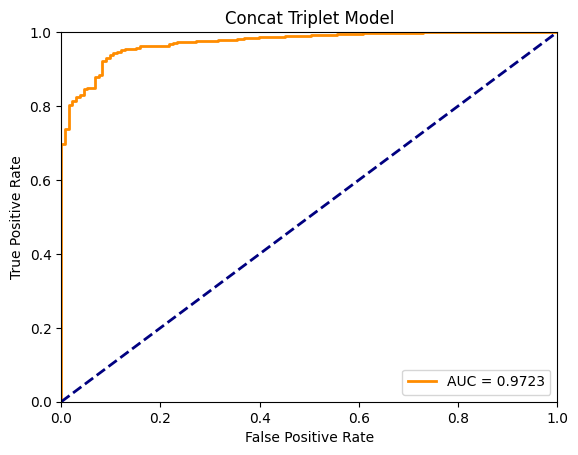

In [28]:
margin = 1.
embedding_net = EmbeddingNet_Concat(num_classes = 1024)
model = TripletNet_Concat(embedding_net)

state_dict = torch.load('/kaggle/input/weight-cal-auc/tri_concat.pt', map_location=torch.device('cuda'))
model.load_state_dict(state_dict, strict=True)
model.eval()
model.to('cuda')

# Lệnh xóa đầu ra
clear_output()

cal_ROC_concat(dir_2d, dir_3d, True)